# Importing the Libraries

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams

# Case Study: 1

Number of fundings received by startups in Bangalore - 637
Number of fundings received by startups in Mumbai - 449
Number of fundings received by startups in NCR - 709


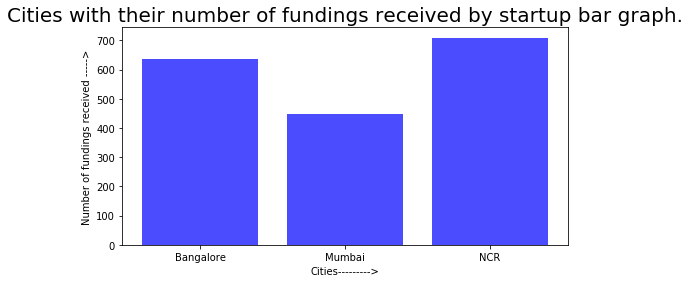

In [71]:
path='startup_funding.csv'
iris=pd.read_csv(path)
df=iris.copy()

#Taking 'Delhi' as 'New Delhi' & 'bangalore' as 'Bangalore'
df["CityLocation"].replace("bangalore","Bangalore",inplace=True)
df["CityLocation"].replace("Delhi","New Delhi",inplace=True)
 
#dropping all na entries for CityLocation column 
df["CityLocation"].dropna(inplace=True)

#Function to get all cities from each row.Split() is used to separate if multiple cities are present in a row
def createDict(cityLocation):
    d={}
    for i in cityLocation:
        if "/" not in i:
        #Only 1 city in a row
            d[i.strip()]=d.get(i.strip(),0)+1
        
        else:
            #More than 1 city in a row
            all_cities=i.strip().split("/")
            for j in all_cities:
                #putting city name as key and count of number of fundings received by the startup in that city in value
                d[j.strip()]=d.get(j.strip(),0)+1
                
    return d

d=createDict(df["CityLocation"])

#extracting the counts for bangalore,mumbai and ncr.
bangalore=d['Bangalore']
mumbai=d['Mumbai']
ncr = d['Noida']+d['Gurgaon']+d['New Delhi']

x=["Bangalore","Mumbai","NCR"]
y=[bangalore,mumbai,ncr]

for i in range(3):
    print("Number of fundings received by startups in",x[i],"-",y[i])

#plotting bar graph.
rcParams['figure.figsize'] = 8,4
plt.bar(x,y,alpha=0.7,color="blue")
plt.title('Cities with their number of fundings received by startup bar graph.',fontdict={'fontsize':20})
plt.xlabel('Cities--------->')
plt.ylabel('Number of fundings received ----->')
plt.show()


# Case Study: 2

Top 5 investors are: 
1. Sequoia Capital - 64
2. Accel Partners - 53
3. Kalaari Capital - 44
4. SAIF Partners - 41
5. Indian Angel Network - 40


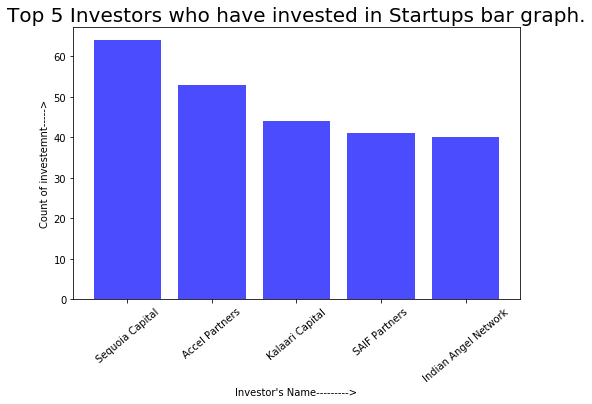

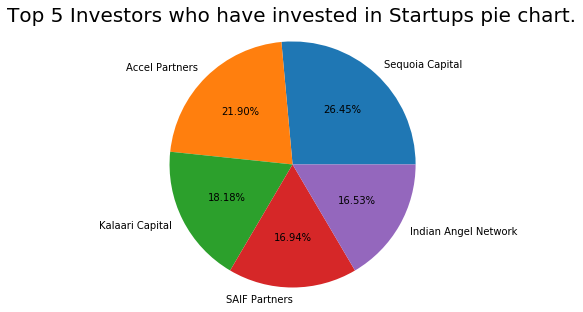

In [72]:
path='startup_funding.csv'
iris=pd.read_csv(path)
df=iris.copy()

df_copy=df.copy()

#marking all type of Undisclosed Investors as 'Undisclosed Investors' in InvestorsName column using replace().
df_copy['InvestorsName'].replace('Undisclosed Investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('undisclosed Investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('undisclosed investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed angel investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed multiple investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed Dubai based HNIs','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed Ex Mckinsey Directors and Partners','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed HNI investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed Japanese investor','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed US Based Investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Un disclosed investors','Undisclosed Investors',inplace = True)

df_copy['InvestorsName'].dropna(inplace=True)


#Function to get all Investors from each row.Split() is used to separate if multiple Investors are present in a row
def createDict(investor):
    d={}
    for i in investor:
        if "," not in i: #Only 1 Investor in a row                   
            if i.strip() not in ['Undisclosed Investors']:  #here we are not considering the 'nan' and 'Undisclosed Investors'.
                d[i]=d.get(i,0)+1
        
        else:
            #More than 1 Investor in a row
            all_investors=i.strip().split(",")
            for j in all_investors:
                #putting InvestorName as key and count of number of times each investor has invested in value
                if j.strip() not in ['Undisclosed Investors']:
                    d[j.strip()]=d.get(j.strip(),0)+1
                
    return d

d=createDict(df_copy["InvestorsName"])


#creating a new dictionary based upon counts on investment in descreasing order.   
Investors={k: v for k,v in sorted(d.items(), key=lambda item:item[1],reverse=True)}

#Getting the first 5 investors with their respective counts of investment.
investor=[]
invested_in=[]
count=0
for i in Investors:
    if count==5:
        break
        
    investor.append(i)
    invested_in.append(Investors[i])
    count+=1
    
print("Top 5 investors are: ")
for i in range(5):
    print(str(i+1)+".",investor[i],"-",invested_in[i])
    

#creating the bargraph.
rcParams['figure.figsize'] = 8,5
plt.bar(investor,invested_in,alpha=0.7,color="blue")
plt.title('Top 5 Investors who have invested in Startups bar graph.',fontdict={'fontsize':20})
plt.xlabel('Investor\'s Name--------->')
plt.ylabel('Count of investemnt----->')
plt.xticks(rotation=40)
plt.show()

#creating the pie chart.
rcParams['figure.figsize'] = 8,5
plt.pie(invested_in,labels=investor,autopct='%.2f%%')
plt.title('Top 5 Investors who have invested in Startups pie chart.',fontdict={'fontsize':20})
plt.axis('equal')
plt.show()

# Case Study: 3

Top 5 investors considering unique investments are: 
1. Sequoia Capital - 48
2. Accel Partners - 47
3. Kalaari Capital - 41
4. Indian Angel Network - 40
5. Blume Ventures - 36


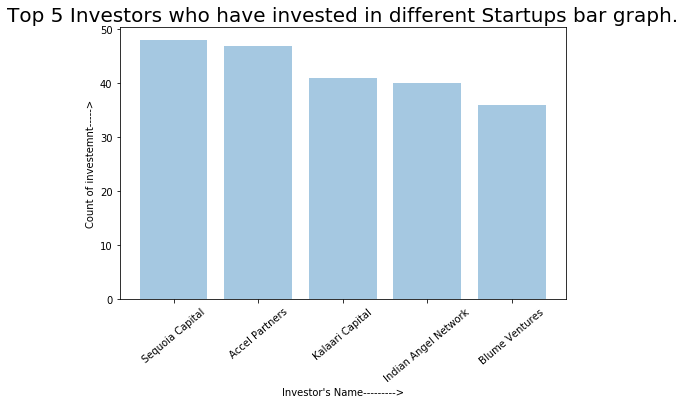

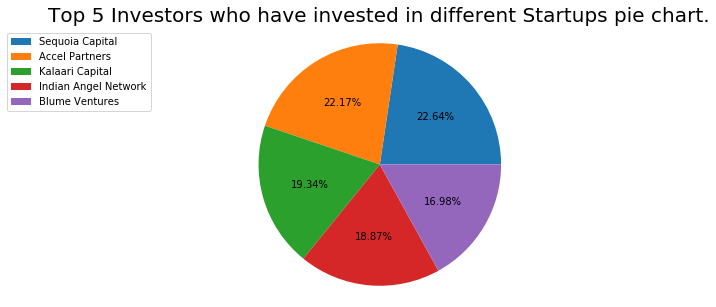

In [73]:
df=pd.read_csv('startup_funding.csv')
df_copy=df.copy()

#correcting all the wrong entries in StartupName column using the replace().
df_copy['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df_copy['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df_copy['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df_copy['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df_copy['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)
df_copy['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df_copy['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df_copy['StartupName'].replace('Olacabs','Ola',inplace = True)

#replacing all the empty entries in InvestorsName column with 'nan' value with fillna().
df_copy.InvestorsName.fillna('nan',inplace=True)

#marking all type of Undisclosed Investors as 'Undisclosed Investors' in InvestorsName column using replace().
df_copy['InvestorsName'].replace('Undisclosed Investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('undisclosed Investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('undisclosed investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed angel investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed multiple investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed Dubai based HNIs','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed Ex Mckinsey Directors and Partners','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed HNI investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed Japanese investor','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed US Based Investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Un disclosed investors','Undisclosed Investors',inplace = True)

#creating a dictionary to store the investors as key and different startups in which they have invested as values.
d={}

#selecting startupName and investorsName from df_copy and storing the result in start_investment. start_investment is thus a dataframe
start_investment=df_copy[['StartupName','InvestorsName']]


for i in start_investment.values:    
    #At the 1th index of each row the InvestorsName values are present, splitting them with split() using delimiter as','.
    inv_names=str(i[1]).split(',')
    
    #iterating over the list returned by split() and with help of strip() removing all extra spaces.  
    for j in inv_names:
        
        #here we are not considering the 'nan' and 'Undisclosed Investors'.
        if j.strip() not in ['nan','Undisclosed Investors']:
            
            #If the investor name is present as key and using set to get unique startups and then adding the startupName value in his startupList.
            if j.strip() in d:
                 d[j.strip()].add(i[0])           
           #Incase the investor Name is not present as key, adding the startupName in his startupList using set.
            else:
                d[j.strip()]={i[0]}

                
#Getting the count of unique investments made by each investor
for i in d:
    d[i]=len(d[i])
    
#creating a new dictionary based upon counts on investment in descreasing order.   
uniq_inve={k: v for k,v in sorted(d.items(), key=lambda item:item[1],reverse=True)}

#Getting the first 5 investors with their respective counts of investment.
investor=[]
invested_in=[]
count=0
for i in uniq_inve:
    if count==5:
        break
    if i!='':
        investor.append(i)
        invested_in.append(uniq_inve[i])
        count+=1

print("Top 5 investors considering unique investments are: ")
for i in range(5):
    print(str(i+1)+".",investor[i],"-",invested_in[i])
    
#creating the bargraph.
plt.bar(investor,invested_in,alpha=0.4)
plt.title('Top 5 Investors who have invested in different Startups bar graph.',fontdict={'fontsize':20})
plt.xlabel('Investor\'s Name--------->')
plt.ylabel('Count of investemnt----->')
plt.xticks(rotation=40)
plt.show()

#creating the pie chart.
legend=[]
for i in investor:
    legend.append(i)
plt.pie(invested_in,autopct='%.2f%%')
plt.title('Top 5 Investors who have invested in different Startups pie chart.',fontdict={'fontsize':20})
plt.legend(legend,bbox_to_anchor=(0, 1))
plt.axis('equal')
plt.show()


# Case Study: 4

Top 5 investors with unique investments and Investment type as Seed Funding and Crowd Funding are: 
1. Indian Angel Network - 33
2. Rajan Anandan - 23
3. LetsVenture - 16
4. Anupam Mittal - 16
5. Kunal Shah - 14


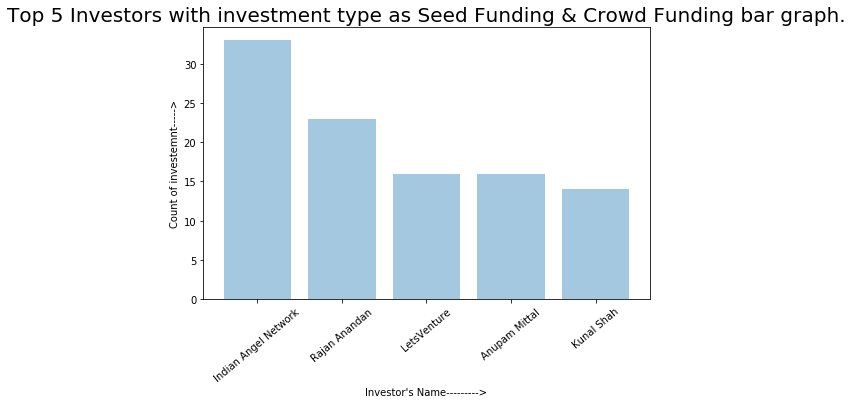

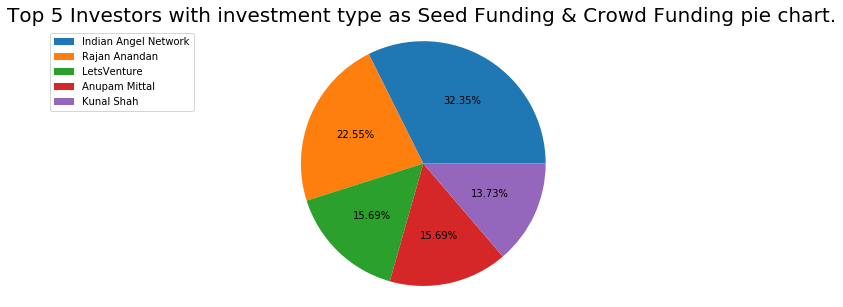

In [74]:
df=pd.read_csv('startup_funding.csv')

df_copy=df.copy()
#Considering only those investors whose investment type is SeedFunding & Crowd Funding.
df_copy.InvestmentType.replace("SeedFunding","Seed Funding",inplace=True)
df_copy.InvestmentType.replace("Crowd funding","Crowd Funding",inplace=True)

df_copy=df_copy[(df_copy["InvestmentType"]=="Seed Funding") | (df_copy["InvestmentType"]=="Crowd Funding")]

#correcting all the wrong entries in StartupName column using the replace().
df_copy['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df_copy['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df_copy['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df_copy['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df_copy['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)
df_copy['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df_copy['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df_copy['StartupName'].replace('Olacabs','Ola',inplace = True)

#replacing all the empty entries in InvestorsName column with 'nan' value with fillna().
df_copy.InvestorsName.fillna('nan',inplace=True)

#marking all type of Undisclosed Investors as 'Undisclosed Investors' in InvestorsName column using replace().
df_copy['InvestorsName'].replace('Undisclosed Investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('undisclosed Investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('undisclosed investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed angel investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed multiple investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed Dubai based HNIs','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed Ex Mckinsey Directors and Partners','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed HNI investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed Japanese investor','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed US Based Investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Un disclosed investors','Undisclosed Investors',inplace = True)


d={}

#selecting startupName and investorsName from df_copy and storing the result in start_investment.
start_investment=df_copy[['StartupName','InvestorsName']]

#iterating over si values in which each row is as a list.
for i in start_investment.values:
    #At the 1th index of each row the InvestorsName values are present, splitting them with split() using delimiter as','.
    inv_names=str(i[1]).split(',')
    
    #iterating over the list returned by split() and with help of strip() removing all extra spaces.  
    for j in inv_names:
        
        #here we are not considering the 'nan' and 'Undisclosed Investors'.
        if j.strip() not in ['nan','Undisclosed Investors']:
            
            #If the investor name is present as key and using set to get unique startups and then adding the startupName value in his startupList.
            if j.strip() in d:
                 d[j.strip()].add(i[0])           
           #Incase the investor Name is not present as key, adding the startupName in his startupList using set.
            else:
                d[j.strip()]={i[0]}

                
#Getting the count of unique investments made by each investor
for i in d:
    d[i]=len(d[i])
    
#creating a new dictionary based upon counts on investment in descreasing order.   
uniq_inve={k: v for k,v in sorted(d.items(), key=lambda item:item[1],reverse=True)}

#Getting the first 5 investors with their respective counts of investment.
investor=[]
invested_in=[]
count=0
for i in uniq_inve:
    if count==5:
        break
    if i!='':
        investor.append(i)
        invested_in.append(uniq_inve[i])
        count+=1

print("Top 5 investors with unique investments and Investment type as Seed Funding and Crowd Funding are: ")
for i in range(5):
    print(str(i+1)+".",investor[i],"-",invested_in[i])
    

#creating the bargraph.
plt.bar(investor,invested_in,alpha=0.4)
plt.title('Top 5 Investors with investment type as Seed Funding & Crowd Funding bar graph.',fontdict={'fontsize':20})
plt.xlabel('Investor\'s Name--------->')
plt.ylabel('Count of investemnt----->')
plt.xticks(rotation=40)
plt.show()

#creating the pie chart.
legend=[]
for i in investor:
    legend.append(i)
plt.pie(invested_in,autopct='%.2f%%')
plt.title('Top 5 Investors with investment type as Seed Funding & Crowd Funding pie chart.',fontdict={'fontsize':20})
plt.legend(legend,bbox_to_anchor=(0, 1))
plt.axis('equal')
plt.show()


# Case Study: 5

Top 5 investors with unique investments and Investment type as Private Equity are: 
1. Sequoia Capital - 45
2. Accel Partners - 43
3. Kalaari Capital - 35
4. Blume Ventures - 27
5. SAIF Partners - 24


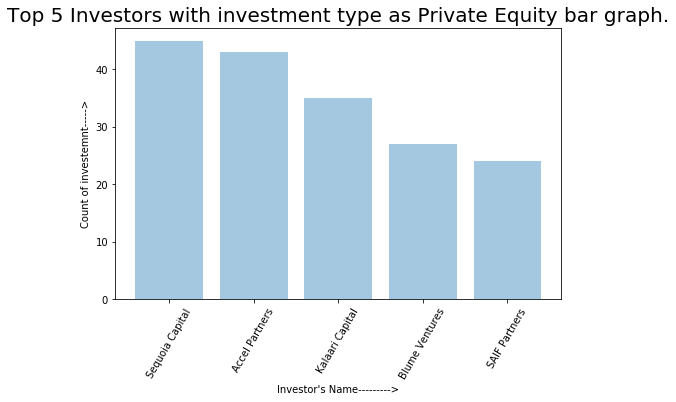

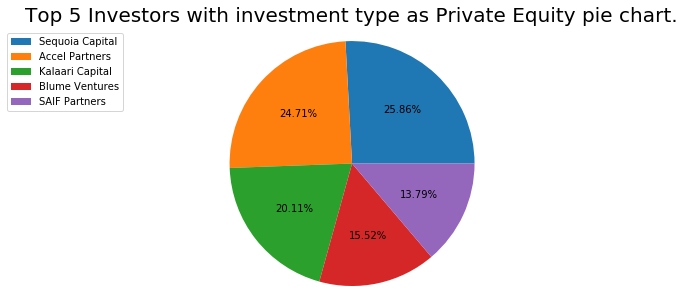

In [75]:
df=pd.read_csv('startup_funding.csv')
df_copy=df.copy()

#Considering only those investors whose investment type is Private Equity.
df_copy.InvestmentType.replace("PrivateEquity","Private Equity",inplace=True)

df_copy=df_copy[df_copy["InvestmentType"]=="Private Equity"]

#correcting all the wrong entries in StartupName column using the replace().
df_copy['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df_copy['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df_copy['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df_copy['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df_copy['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)
df_copy['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df_copy['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df_copy['StartupName'].replace('Olacabs','Ola',inplace = True)

#replacing all the empty entries in InvestorsName column with 'nan' value with fillna().
df_copy.InvestorsName.fillna('nan',inplace=True)

#marking all type of Undisclosed Investors as 'Undisclosed Investors' in InvestorsName column using replace().
df_copy['InvestorsName'].replace('Undisclosed Investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('undisclosed Investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('undisclosed investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed angel investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed multiple investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed Dubai based HNIs','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed Ex Mckinsey Directors and Partners','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed HNI investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed Japanese investor','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Undisclosed US Based Investors','Undisclosed Investors',inplace = True)
df_copy['InvestorsName'].replace('Un disclosed investors','Undisclosed Investors',inplace = True)


d={}

#selecting startupName and investorsName from df_copy and storing the result in start_investment.
start_investment=df_copy[['StartupName','InvestorsName']]

#iterating over si values in which each row is as a list.
for i in start_investment.values:
    #At the 1th index of each row the InvestorsName values are present, splitting them with split() using delimiter as','.
    inv_names=str(i[1]).split(',')
    
    #iterating over the list returned by split() and with help of strip() removing all extra spaces.  
    for j in inv_names:
        
        #here we are not considering the 'nan' and 'Undisclosed Investors'.
        if j.strip() not in ['nan','Undisclosed Investors']:
            
            #If the investor name is present as key and using set to get unique startups and then adding the startupName value in his startupList.
            if j.strip() in d:
                 d[j.strip()].add(i[0])           
           #Incase the investor Name is not present as key, adding the startupName in his startupList using set.
            else:
                d[j.strip()]={i[0]}

#Getting the count of unique investments made by each investor
for i in d:
    d[i]=len(d[i])
    
#creating a new dictionary based upon counts on investment in descreasing order.   
uniq_inve={k: v for k,v in sorted(d.items(), key=lambda item:item[1],reverse=True)}

#Getting the first 5 investors with their respective counts of investment.
investor=[]
invested_in=[]
count=0
for i in uniq_inve:
    if count==5:
        break
    if i!='':
        investor.append(i)
        invested_in.append(uniq_inve[i])
        count+=1


print("Top 5 investors with unique investments and Investment type as Private Equity are: ")
for i in range(5):
    print(str(i+1)+".",investor[i],"-",invested_in[i])
    

#creating the bargraph.
plt.bar(investor,invested_in,alpha=0.4)
plt.title('Top 5 Investors with investment type as Private Equity bar graph.',fontdict={'fontsize':20})
plt.xlabel('Investor\'s Name--------->')
plt.ylabel('Count of investemnt----->')
plt.xticks(rotation=60)
plt.show()

#creating the pie chart.
legend=[]
for i in investor:
    legend.append(i)
plt.pie(invested_in,autopct='%.2f%%')
plt.title('Top 5 Investors with investment type as Private Equity pie chart.',fontdict={'fontsize':20})
plt.legend(legend,bbox_to_anchor=(0, 1))
plt.axis('equal')
plt.show()
